# Approach
本题最重要的是理解题意！

第一个机器人先从方格的左上角走到右下角，走完之后刚刚经过的格子都变成0！第二个机器人再从此时的方格的左上角走到右下角！根据题目要求，两个机器人都只能往下或往右走，因此第一个机器人的路线可以总结为：先向右走i格，再向下走1格，再向右走len(grid[0])-1-i格！其中0<=i<=len(grid[0]-1)！i=0表示先向下走一格再一直走到右下角，i=len(grid[0]-1)表示先一直走到右上角再向下走一格到右下角！综上，我们可以将第一个机器人走的路线理解为Z形，走完之后这个Z形上的所有数字都变成了0！因此，第二个机器人为了让走的数字和尽可能的大，只有两种选择：1.先向下走一格再一直走到右下角 2.先一直走到右上角再向下走一格到右下角！这样才可以确保经过最多的非零格子！综上，第二个机器人走的数字和是第一行中Z上方剩下的部分(右上方)的数字和与第二行中Z下方剩下的部分(左下方)的数字和的最大值！如下图所示：
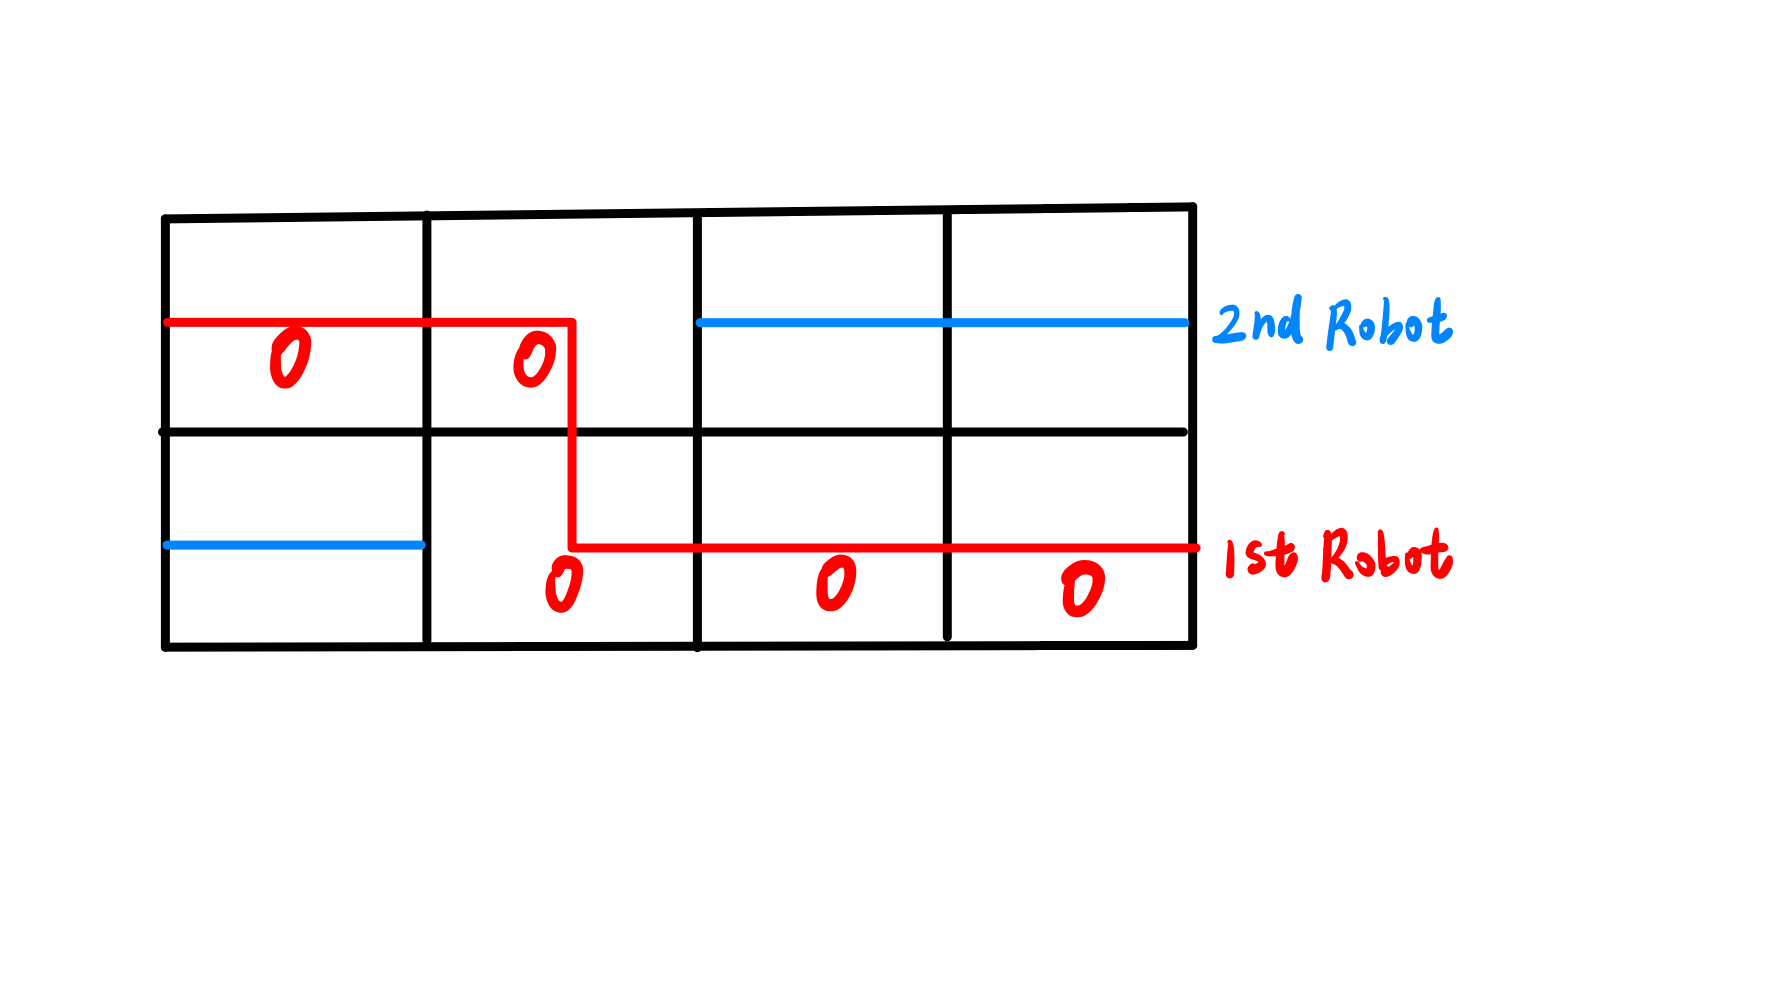

注意第一个机器人的目的是为了让第二个机器人走的数字和尽可能的小，因此我们需要找到所有第二个机器人走的数字和，取最小值！具体做法：遍历所有第一个机器人的路线，即0<=i<=len(grid[0]-1)，每次遍历中我们都要计算第一个机器人走完之后第二个机器人走的数字和(右上方和左下方的数字和的最大值)，我们要取所有遍历中第二个机器人走的数字和的最小值，这就是最终答案！取右上方和左下方的数字和的最大值是为了满足第二个机器人的目的，取所有第二个机器人走的数字和的最小值是为了满足第一个机器人的目的！    

code中的第一段代码的错误之处在于没有理解第一个机器人的目的，该段代码的做法是让第一个机器人走的数字和最大，即取第一个机器人的所有路线中的数字和的最大值，我认为这个就是第一个机器人的路线！但是这并不能保证此时第二个机器人走的数字和(右上方和左下方的数字和的最大值)是其所有路线中的最小值！综上，正确的做法是取所有第二个机器人走的数字和的最小值！

code中的第二段代码之所以TLE是因为list slicing的次数太多了！因此我们可以采用prefix sum的知识来描述第一行中Z上方剩下的部分(右上方)的数字和与第二行中Z下方剩下的部分(左下方)的数字和！因为当i从0到len(grid[0])时，右上方的数字和是不断减小的，即从sum(grid[0])开始不断减去grid[0][i]！左下方的数字和是不断增加的，即从0开始不断加上grid[1][i-1]！   


# Note


# Code

In [ ]:
# This is wrong!
class Solution:
    def gridGame(self, grid: List[List[int]]) -> int:
        result = 0
        idx = -1

        top, bottom = 0, 0

        for i in range(len(grid[0])):
            top += grid[0][i]
            bottom = bottom - grid[1][i - 1] if i > 0 else sum(grid[1])
            if top + bottom > result:
                result = top + bottom
                idx = i

        return max(sum(grid[0][idx + 1 : :]), sum(grid[1][0 : idx]))

In [ ]:
# This is correct, but TLE! Because too many list slicing!
class Solution:
    def gridGame(self, grid: List[List[int]]) -> int:
        result = float('inf')

        for i in range(len(grid[0])):
            topRight = sum(grid[0][i + 1 : :])
            bottomLeft = sum(grid[1][0 : i])
            result = min(result, max(topRight, bottomLeft))
        
        return result

In [ ]:
class Solution:
    def gridGame(self, grid: List[List[int]]) -> int:
        result = float('inf')

        topRight = sum(grid[0])
        bottomLeft = 0

        for i in range(len(grid[0])):
            topRight -= grid[0][i]
            bottomLeft = bottomLeft + grid[1][i - 1] if i > 0 else bottomLeft
            result = min(result, max(topRight, bottomLeft))
        
        return result